The meaning behind Probability and Statstics:

https://byjus.com/maths/probability-and-statistics/

Probability is how likely an event is to occur. (Like flipping a coin, P(Heads) = 1/2)

3 different types of probability: (all good things come in three)

Theoretical Probability - based on reasoning.
Experimental Probability - based on observed data
Axiomatic Probability - builds on formal rules (Kolmogorov's axioms) 

Statistics is the study of how to collect, summarize, interpret, present and draw conclusions from data of any kind.

Data can be Quantitative (like numerica data, countable, or any value in a range) vs Qualitative (categorical or descriptive)

**(Example problems on there aswell, do later)**

Variance measures the spread of outcomes around the mean.

Explore more: https://www.studocu.com/ph/document/sti-west-negros-university/electrical-engineering/probability-and-statistics-definition-terms-formulas-and-examples/41414861?utm_source=chatgpt.com


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [3]:

rest_lines = np.array([5000.0, 6000.0, 6500.0])   # H‑beta, [O III], H‑alpha-ish placeholders
amps       = np.array([1.0,   0.8,   0.6])        # relative line strengths/

In [4]:
wl = np.linspace(4800, 9000, 7000)

# Guassian:
# w: an array of values. Represents the wavelength.
# w0: represents the center of the peak where Gaussian is tallest.
# amp: the amplitude of the peak
# sigma: a small sigma makes the peak narrow and steep. (standard deviation)
# big sigma makes it wide and smooth
def gaussian(w, w0, amp, sigma=3.0):
    """Simple Gaussian line profile"""
    return amp * np.exp(-(w - w0)**2 / (2.0 * sigma**2))

#Zeros_like returns an array of zeros 
# with the same shape and size as a

# Build rest‑frame template spectrum
template_flux = np.zeros_like(wl)
for w0, amp in zip(rest_lines, amps):
    template_flux += gaussian(wl, w0, amp)


The equation looks like this:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$


$x$ represents the Variable

$\mu$ represents the Mean

$\sigma$ represents standard deviation

$e$ represents the base of the natural log.

properties of Gaussian Distribution:
    
-Symmetric around it's mean

-unimodal (one MODE) (means only one peak)

-Asymptotic

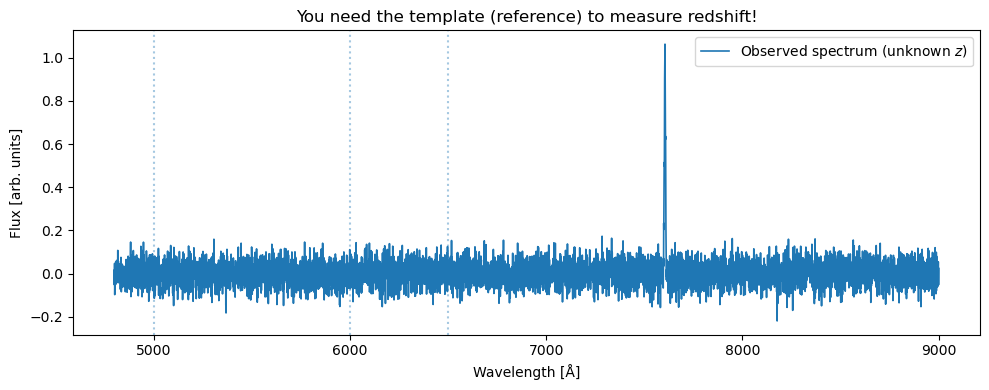

In [ ]:
# ------------------------------------
# Apply a redshift to generate “data”
# ------------------------------------
z_true = np.random.rand(1)                    # the unknown redshift we’ll try to recover
obs_lines = (1.0 + z_true) * rest_lines

observed_flux = np.zeros_like(wl)
for w0, amp in zip(obs_lines, amps):
    observed_flux += gaussian(wl, w0, amp)

# Add a touch of noise so it looks more realistic
rng = np.random.default_rng(42)
observed_flux += 0.05 * rng.normal(size=wl.size)

# ------------------------------------
# Plot: template vs. observed spectrum
# ------------------------------------


plt.figure(figsize=(10, 4))
plt.plot(wl, observed_flux, label=f"Observed spectrum (unknown $z$)", linewidth=1.2)

    #plt.scatter(peaks, wl[peaks])
#plt.plot(wl, template_flux, '--', label="Template (rest‑frame)", linewidth=1.2)

# Mark the *rest* wavelengths (dotted) and observed wavelengths (dash‑dot)
for w_rest, w_obs in zip(rest_lines, obs_lines):
    plt.axvline(w_rest, linestyle=':', alpha=0.4)
    #plt.axvline(w_obs,  linestyle='-.', alpha=0.4)


plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [arb. units]")
plt.title("You need the template (reference) to measure redshift!")
plt.legend()
plt.tight_layout()
plt.show()



In a gauissian distribution:
    
    -68% of the values lie within 1 standard deviation of the mean
    (This is what it means when people say something is within "1sd")

    -95% of values lie within 2sd
    
    -99.7 lie within 3sd

So, to isolate the data that I want, I'm aiming to use 3 standard deviations or more to get rid of the 'noise'.

Below is a visual plot with the Gaussian Distribution that shows 1 standard deviation, 2 standard deviations, and 3 standard deviations.

For Gaussian Distribution, z-scores are used to measure how many standard deviations a data point is from the mean.

$$ z = \frac{x-\mu}{\sigma} $$

$x$ = value

$\mu$ = mean

$\sigma$ = standard deviation

3 or more standard deviations means z >= 3.

This is the general formula for the threshold beyond N standard deviations:

$$ x = \mu + n\sigma $$

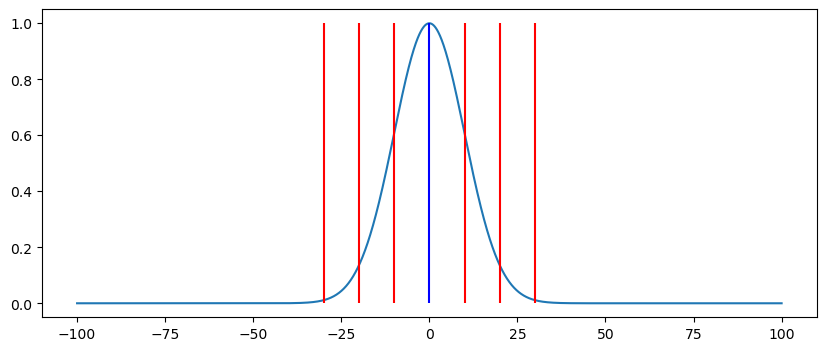

In [22]:
# The X and Y values for the plot below.

gaussianX = np.linspace(-100, 100, 3000)

sd = 10
mean = np.mean(gaussianX)

# Calculating gaussian Y values.
gaussianY = gaussian(mean, gaussianX, 1, sigma= sd)

plt.figure(figsize=(10, 4))
plt.plot(gaussianX, gaussianY)

# Below is the different standard deviation(s) from 1 to 3. The blue line is the mean.
plt.vlines(x=mean, colors=['b'], ymin=0, ymax=1)
for n in range(1, 4):
    plt.vlines(x=mean + n * sd, colors=['r'], ymin=0, ymax=1)
    plt.vlines(x=mean - n * sd, colors=['r'], ymin=0, ymax=1)


plt.show()



This was to show how much 3 or more standard deviations would be, and how much data I would be excluding.

So, when isolating the data that I want from the observed_flux, I would need to calculate the mean, then take the data that is the mean + 4 standard deviations. I did this because everything above the 'noise' is important, and below is not.

There's a upside and downside to choosing 4 standard deviations. The upside being it will get rid of noise, like I would like. The downside being it might miss subtle signals.

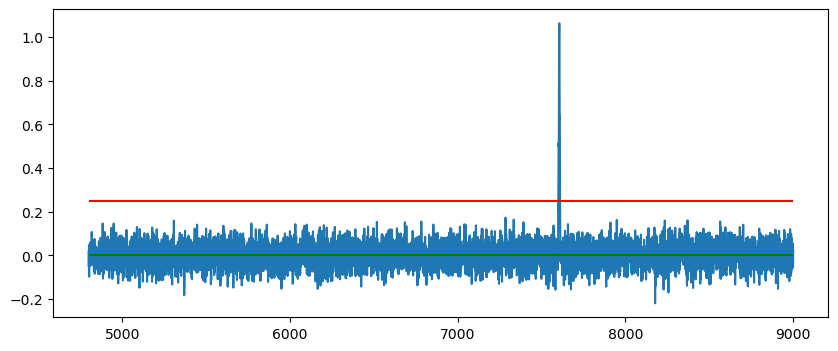

In [7]:
std = np.std(observed_flux)
mean = np.mean(observed_flux)

fourSTD = mean + 4 * std

plt.figure(figsize=(10, 4))
plt.plot(wl, observed_flux)\

plt.hlines(y=mean, colors=['g'], xmax=9000, xmin=4800)
plt.hlines(y = fourSTD, colors='r', xmax=9000, xmin=4800)



Everything above the red line I want to keep. So, I will add everything above the red line from observed_flux to another array. I will also keep track of the X values associated so later I can calculate redshift.

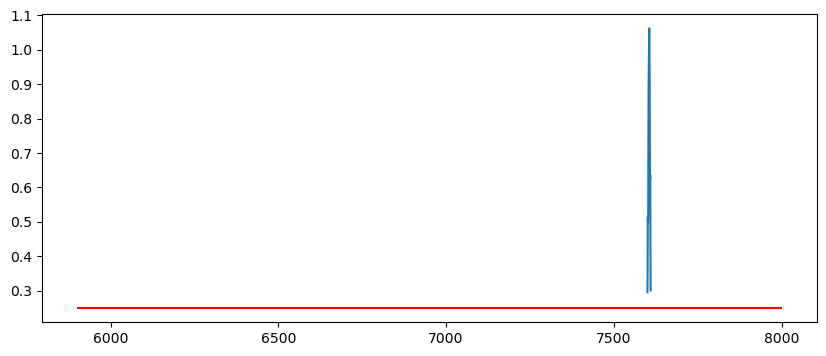

In [8]:
indices = np.where(fourSTD < observed_flux[:])

# Grabbing the places from observed_flux that are above the red line in the plot above.
eyObs_flux = observed_flux[indices]
# Grabbing the x values that correlate to the data above the red line.
exwl = wl[indices]

plt.figure(figsize=(10,4))
plt.plot(exwl, eyObs_flux)
plt.hlines(y=fourSTD, xmax=8000, xmin=5900, colors=['r'])

Above is the plot of all of the data I want to focus on. 

Next, I will group the moutains/peaks, as to not pick up any unwanted points when filtering for the top of each peak.

In [9]:
def find_moutains(yvals, xvals):
    moutains = []
    xmount = []

    for i in range(1, len(yvals) - 1):
        # finding a 'middle' of the moutian. 
        if yvals[i-1] < yvals[i] and yvals[i] > yvals[i+1]:
            #left egde
            left = i - 1
            while left > 0 and yvals[left - 1] < yvals[left]:
                left -= 1

            # Now for right edge
            right = i + 1
            
            while right < len(yvals) - 1 and yvals[right + 1] < yvals[right]:
                right += 1

            moutains.append(yvals[left:right + 1])
            xmount.append(xvals[left:right + 1])
    return moutains, xmount

In [10]:
# The above runs until it finds one of those 'middle' values, then I take that i value to find the left side first. While the left value is greater than 0, (as to not to throw 
# out of bounds), and the points im grabbing have a positive slope. Same thing with right but as long as it has a negative slope.
# I then append from the left index to the right index for both y values and x values.


3


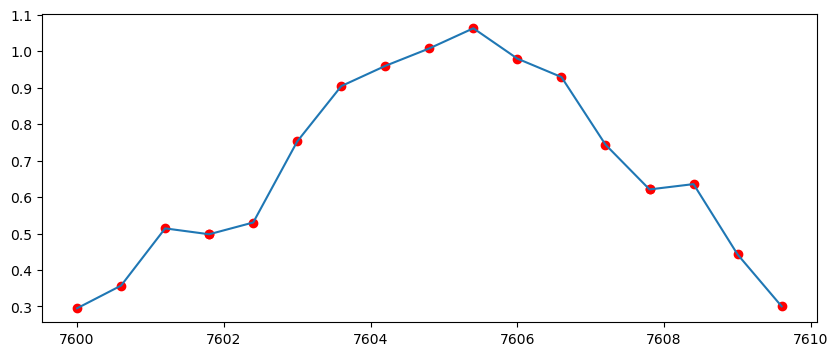

In [11]:
ymount, xmount = find_moutains(eyObs_flux, exwl)
print(len(ymount))
plt.figure(figsize=(10,4))
plt.plot(exwl, eyObs_flux)

for n in range(0, len(xmount)):
    plt.scatter(xmount[n], ymount[n], color='r')

In [12]:
# Now, to find the 'maximum' value in each of the sections of the array.
peaksY = []

indcD = []
for n in range(0, len(ymount)):
    #Find max. add to peaks of Y
    max = np.max(ymount[n])
    peaksY.append(max)
   
    #This was to find the indcies for the X.
    for i in range(0, len(ymount[n])):
        if(ymount[n][i] == max):
            indcD.append(i)    

peaksX = []
for i in range(0, len(xmount)):
    peaksX.append(xmount[i][indcD[i]])

print(peaksX)
print(peaksY)


[np.float64(7601.200171453065), np.float64(7605.400771538792), np.float64(7608.401200171453)]
[np.float64(0.5140531242226578), np.float64(1.0623925914403207), np.float64(0.635383984161176)]


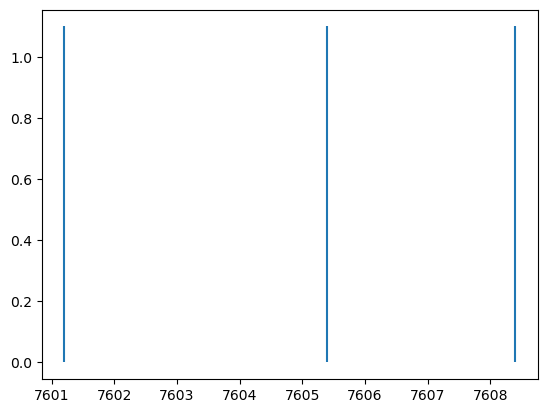

In [13]:
plt.vlines(x=peaksX, ymin=0, ymax=1.1)

In [14]:
# compare all the peaks found. calculate redshift and filter out the peaks that do not equally line up to the actually emitted lines.

In [15]:

# I'm just going to go ahead and calculate redshift. then I will find the closest numbers in each array.
def findRedshifts(xVals, rests):
    redshifts = []
    for i in range(0, len(rests)):
        tempArr = []
        for n in range(0, len(xVals)):
            z = abs(rests[i] - xVals[n]) / rests[i]
            tempArr.append(z)
        redshifts.append(tempArr)
    return redshifts

In [16]:
redshifts = findRedshifts(peaksX, rest_lines)
# print(redshifts[1])

# Not going to work how I want it to. ugh...


In [17]:

def find_closest(reds):
    row1, row2, row3 = reds
    mindif = float('inf')
    besttriple = []

    for i in range(len(row1)):
        for j in range(len(row2)):
            for k in range(len(row3)):
                a, b, c = row1[i], row2[j], row3[k]
                vals = [a, b, c]
                diff = np.max(vals) - np.min(vals)
                if diff < mindif:
                    mindif = diff
                    besttriple = [a, b, c]
    return besttriple


In [18]:
closestReds = find_closest(redshifts)


print(f'The three redshifts I found where: {closestReds}. The real redshift is:  {z_true}')

The three redshifts I found where: [np.float64(0.520240034290613), np.float64(0.26686669524217754), np.float64(0.17052326156483888)]. The real redshift is:  [0.52102882]


In [19]:
print(len(redshifts))

3
